In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
models = tf.keras.models
layers = tf.keras.layers
utils = tf.keras.utils
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
preprocessing_image = tf.keras.preprocessing.image
applications = tf.keras.applications

In [3]:
# load pre-trained Xception model and exclude top dense layer
base_model = applications.Xception(include_top=False,
                                   weights='imagenet',
                                   input_shape=(299,299,3),
                                   pooling='avg')

In [4]:
print("Model input shape: {}\n".format(base_model.input_shape))
print("Model output shape: {}\n".format(base_model.output_shape))
print("Model number of layers: {}\n".format(len(base_model.layers)))

Model input shape: (None, 299, 299, 3)

Model output shape: (None, 2048)

Model number of layers: 133



In [5]:
def fine_tune_Xception(base_model):

    # output of convolutional layers
    x = base_model.output

    # final Dense layer
    outputs = layers.Dense(4, activation='softmax')(x)

    # define model with base_model's input
    model = models.Model(inputs=base_model.input, outputs=outputs)

    # freeze weights of early layers
    # to ease training
    for layer in model.layers[:40]:
        layer.trainable = False

    return model

In [6]:
def compile_model(model):

    # loss
    loss = losses.sparse_categorical_crossentropy

    # optimizer
    optimizer = optimizers.RMSprop(lr=0.0001)

    # metrics
    metric = [metrics.categorical_accuracy]

    # compile model with loss, optimizer, and evaluation metrics
    model.compile(optimizer, loss, metric)

    return model

In [7]:
model = fine_tune_Xception(base_model)
model = compile_model(model)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
import os
print(os.listdir(r"C:\Users\HP\Downloads\twoclassweather"))

path = r"C:\Users\HP\Downloads\twoclassweather"

train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True,shear_range = 10,zoom_range = 0.2,preprocessing_function =preprocess_input )
train_generator = train_datagen.flow_from_directory(path+"/train",target_size = (224,224),shuffle = True,class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function = preprocess_input)
test_generator = test_datagen.flow_from_directory(path + "/test",target_size = (224,224),shuffle = False,class_mode = 'binary')

['test', 'train']
Found 10000 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [9]:
history = model.fit_generator(train_generator,steps_per_epoch = 10,epochs = 10,verbose = 1, validation_data = test_generator, validation_steps = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 157s 16s/step - loss: 1.1035 - categorical_accuracy: 0.0469 - val_loss: 1.5333 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 104s 10s/step - loss: 0.7493 - categorical_accuracy: 0.5562
Epoch 3/10
10/10 [==============================] - 104s 10s/step - loss: 0.6767 - categorical_accuracy: 0.4313
Epoch 4/10
10/10 [==============================] - 125s 12s/step - loss: 0.5817 - categorical_accuracy: 0.6094
Epoch 5/10
10/10 [==============================] - 123s 12s/step - loss: 0.5316 - categorical_accuracy: 0.5094
Epoch 6/10
10/10 [==============================] - 119s 12s/step - loss: 0.5282 - categorical_accuracy: 0.4781
Epoch 7/10
10/10 [==============================] - 119s 12s/step - loss: 0.5285 - categorical_accuracy: 0.4719
Epoch 8/10
10/10 [==============================] - 127s 13s/step - loss: 0.4751 -

In [10]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 15))

    # plot train and test accuracy
    plt.subplot(4,4,1)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('SqueezeNet accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(4,4,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('SqueezeNet loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

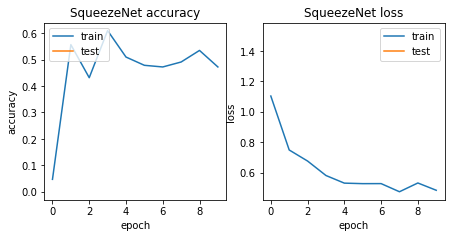

In [11]:
plot_accuracy_and_loss(history)

In [12]:
# save model architecture
model_json = model.to_json()
open('xception_model.json', 'w',encoding='utf8').write(model_json)

# save model's learned weights
model.save('image_classifier_xception.hdf5', overwrite=True)

In [13]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from sklearn.utils.multiclass import unique_labels

modell = load_model(r"C:\Users\HP\image_classifier_xception.hdf5")

test_image = image.load_img(r"C:\Users\HP\Downloads\clod.jpg",target_size = (224,224))
test=image =  image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = modell.predict(test_image)

if result[0][0] == 1:
    prediction = "cloudy"
    print(prediction)
else:
    prediction = "sunny"
    print(prediction)


sunny
